In [1]:
import re
import nltk
#nltk.download("stopwords")  #downloading stopwords
#nltk.download('punkt')
#nltk.download('wordnet')
import nltk as nlp
import string
from nltk import word_tokenize,sent_tokenize
from sklearn import preprocessing
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,precision_score
from jpype import JClass, JString, getDefaultJVMPath, shutdownJVM, startJVM, java

import seaborn as sns

from sklearn.metrics import r2_score
import statsmodels.api as sm

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression  
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier 

from sklearn import metrics

from sklearn.model_selection import KFold, train_test_split, cross_val_predict, cross_val_score


import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences 
from sklearn.feature_extraction.text import CountVectorizer 
from wordcloud import WordCloud 
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,precision_score
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [3]:
import urllib.request
import os
import tempfile
import sys
import fileinput
import logging
import jpype

# Bu 2 sütun category ve text ismindedir. Category sınıfı bizim tahmin etmeye çalışacağımız sınıftır ve 7 farklı değer almaktadır. Sınıflarımız ve sayıları aşağıdaki gibidir.

dunya         700
ekonomi       700
spor          700
teknoloji     700
kultur        700
saglik        700
siyaset       700

In [4]:
df = pd.read_csv("7allV03.csv")
df

,category,text
0,siyaset,3 milyon ile ön seçim vaadi mhp nin 10 olağan...
1,siyaset,mesut_yılmaz yüce_divan da ceza alabilirdi pr...
2,siyaset,disko lar kaldırılıyor başbakan_yardımcısı ar...
3,siyaset,sarıgül anayasa_mahkemesi ne gidiyor mustafa_...
4,siyaset,erdoğan idamın bir haklılık sebebi var demek ...
...,...,...
4895,teknoloji,iphone lara geri dönüyor ios 6 sürümüyle tele...
4896,teknoloji,muslukta devrim sadece elimizi yıkadığımız mu...
4897,teknoloji,halka iyi anlatılmalı bilgi_teknolojileri ile...
4898,teknoloji,çöpe gidiyorlar apple 775 bin uygulamayla app...


In [5]:
df.category.count()

4900

Öncelikle, tahmin etmeye çalıştığımız sınıfımızı sayısal değerlere çevirmeliyiz. Basit bir şekilde her sınıf için 0'dan başlayarak numaralandırabiliriz. Bunun için genellikle sklearn[2]kütüphanesinin LabelEncoder’i kullanılır.

In [6]:
encoder = preprocessing.LabelEncoder()
y = encoder.fit_transform(df.category)

y

array([4, 4, 4, ..., 6, 6, 6])

In [8]:
def tokenizasyon(text):
    return word_tokenize(text)
def lemmatizer(text):
    lemma_words = []
    ZEMBEREK_PATH = r'C:\Users\Ensar\Desktop\ml\zemberek-full.jar'
    if jpype.isJVMStarted() is False:
        startJVM(getDefaultJVMPath(), '-ea', '-Djava.class.path=%s' % (ZEMBEREK_PATH))
    TurkishMorphology = JClass('zemberek.morphology.TurkishMorphology')
    morphology = TurkishMorphology.createWithDefaults()
    for text in tokenizasyon(text):
        lemma_word = str(morphology.analyzeAndDisambiguate(str(text)).bestAnalysis()[0].getLemmas()[0])
        lemma_words.append(lemma_word)
    text = ' '.join(lemma_words)
    return text

def convert_lowercase(text):
    return text.lower()
def remove_punctuation(text):
    return ''.join(d for d in text if d not in string.punctuation)
def remove_stopwords(text):
    stopwords = []
    with open(r'C:\Users\Ensar\Desktop\ml\stopwords.txt', 'r',encoding='utf-8') as f:
        for word in f:
            word = word.split('\n')
            stopwords.append(word[0])
    clean_text = ' '.join(s for  s in text.split() if s not in stopwords)
    return clean_text
def remove_numbers(text):
    text = re.sub(r'\d', '', text)
    return text
def remove_less_than_2(text):
    text = ' '.join([w for w in text.split() if len(w)>2])
    return text
def remove_extra_space(text):
    ornek_text_strip = re.sub(' +', ' ', text)
    return ornek_text_strip.strip()

# ÖN İŞLEME

In [9]:
# df['text'] için ön işleme yapıldı
""" 
df['text'] = df['text'].apply(lemmatizer)
df['text'] = df['text'].apply(convert_lowercase)
df['text'] = df['text'].apply(remove_punctuation)
df['text'] = df['text'].apply(remove_stopwords)
df['text'] = df['text'].apply(remove_extra_space)
df['text'] = df['text'].apply(remove_numbers)
df['text'] = df['text'].apply(remove_less_than_2)
"""

In [10]:
"""
texts = []
for text in df.text:
    texts.append(text)
"""

In [12]:
texts

['seçim vaat mhp unk olağan büyük kurultay nda konuş genel başkan aday unk seçim parti üye sayı ulaş hedef koy seçim uygula vaat bulun mhp unk olağan büyük kurultay nda konuş genel başkan aday unk seçim parti üye sayı ulaş hedef koy seçim uygula vaat bulun unk aday unk kürsü bekle yap tezahürat ıslıkla üzeri divan başkan unk mhp unk genel başkan genel başkan aday saygıdeğer salon ciddi zor taşkın izin ver salon sükunet sağla konuş başla vurgula türkeş unk unk kurultay konuş aday ikinci konuş yap açıkla konuş kurultay mhp unk baş iktidar vesile dile aydın unk unk mhp eleştir kale fethet yol devam söyle hatırla iktidar basın sivil toplum sus ifade unk unk bürokrasi taş üst taş bırak ileri sür aydın ülkü düşman kabul kıyma makine geçir zihniyet sürgün ora bura sal bürokrasi ülkü kadro savaş yaşa skandal ardından devlet çete mantık yönet siyasi iktidar savun aydın iktidar belediye sahte rapor dinle sal savun aydın arka habur dan içeri sok vatan hain karşıla tören yet oslo terörist kur paza

In [32]:
# önişlenmiş verileri kelimeler.txt olarak kaydediyorum
"""
with open("kelimeler.txt", 'w') as f:
    for s in texts:
        f.write(str(s) + '\n')
"""

In [7]:
# önişlenmiş verileri çağırıyorum
with open("kelimeler.txt", 'r') as f:
    kelimeler = [line.rstrip('\n') for line in f]

kelimeler

['seçim vaat mhp unk olağan büyük kurultay nda konuş genel başkan aday unk seçim parti üye sayı ulaş hedef koy seçim uygula vaat bulun mhp unk olağan büyük kurultay nda konuş genel başkan aday unk seçim parti üye sayı ulaş hedef koy seçim uygula vaat bulun unk aday unk kürsü bekle yap tezahürat ıslıkla üzeri divan başkan unk mhp unk genel başkan genel başkan aday saygıdeğer salon ciddi zor taşkın izin ver salon sükunet sağla konuş başla vurgula türkeş unk unk kurultay konuş aday ikinci konuş yap açıkla konuş kurultay mhp unk baş iktidar vesile dile aydın unk unk mhp eleştir kale fethet yol devam söyle hatırla iktidar basın sivil toplum sus ifade unk unk bürokrasi taş üst taş bırak ileri sür aydın ülkü düşman kabul kıyma makine geçir zihniyet sürgün ora bura sal bürokrasi ülkü kadro savaş yaşa skandal ardından devlet çete mantık yönet siyasi iktidar savun aydın iktidar belediye sahte rapor dinle sal savun aydın arka habur dan içeri sok vatan hain karşıla tören yet oslo terörist kur paza

# EĞİTİM VE TEST

CountVectorizer ile verimizi vektörleştiriyoruz.

# 1. CountVectorizer

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
max_features=500
cv = CountVectorizer(max_features=max_features) 
X = cv.fit_transform(kelimeler).toarray()

In [21]:
X.shape

(4900, 500)

TF-IDF ile verimizi vektörleştiriyoruz.

# 2. TFidfVectorizer

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

max_features=500 # "number" most common(used) words in reviews
tfidf = TfidfVectorizer(ngram_range=(1,2), max_features=5000) 
X = tfidf.fit_transform(kelimeler).toarray()

In [27]:
X.shape

(4900, 5000)

In [28]:
y

array([4, 4, 4, ..., 6, 6, 6])

In [29]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

Daha sonra kullanacağımız makine öğrenmesi yöntemlerini tanımlayıp eğitimini ardından testini, yani tahmin etme işlemini gerçekleştiriyoruz.

# SINIFLANDIRMALAR  __________________________________________________________________________________________________

In [ ]:
# TFidfVectorizer SONUÇLARI
""" ÖNCEKİ PARAMETRELERİ VERİNCE
Knn Accuracy değeri: 80.61224489795919
Knn Precision değeri: 68.32298136645963
Knn Recall değeri: 83.96946564885496
Knn F1 Score değeri: 75.34246575342463
MAE değeri: 0.5755102040816327
MSE değeri: 2.142857142857143
RMSE değeri: 1.4638501094227998

K-FOLD : 80.53571428571426
"""


""" PARAMETRESİZ KNN SONUÇLARI
Knn Accuracy değeri: 84.08163265306122
Knn Precision değeri: 79.06976744186046
Knn Recall değeri: 77.86259541984732
Knn F1 Score değeri: 78.46153846153847
MAE değeri: 0.463265306122449
MSE değeri: 1.6959183673469387
RMSE değeri: 1.3022743057232369

K-FOLD: 82.98469387755102
"""

              precision    recall  f1-score   support

           0       0.79      0.78      0.78       131
           1       0.78      0.82      0.80       142
           2       0.83      0.91      0.87       139
           3       0.88      0.93      0.91       122
           4       0.87      0.65      0.75       158
           5       0.91      0.95      0.93       147
           6       0.81      0.87      0.84       141

    accuracy                           0.84       980
   macro avg       0.84      0.84      0.84       980
weighted avg       0.84      0.84      0.84       980

Knn Accuracy değeri: 84.08163265306122
Knn Precision değeri: 79.06976744186046
Knn Recall değeri: 77.86259541984732
Knn F1 Score değeri: 78.46153846153847
MAE değeri: 0.463265306122449
MSE değeri: 1.6959183673469387
RMSE değeri: 1.3022743057232369


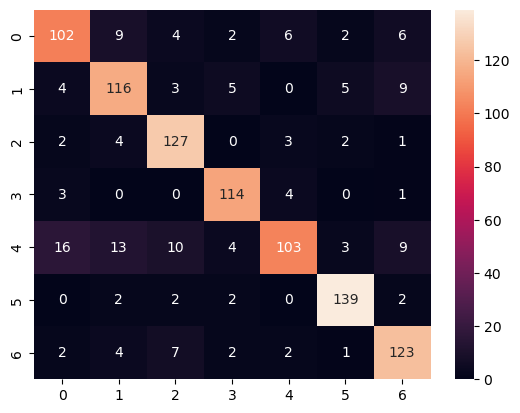

In [30]:
#KNN
warnings.filterwarnings('ignore')

from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

y_pred=knn.predict(X_test)

print(classification_report(y_test,y_pred))

# Accuracy
knnDogruluk=accuracy_score(y_test,y_pred)
print("Knn Accuracy değeri:",knnDogruluk*100)

# Precision
from sklearn.metrics import precision_score
Precision =  precision_score(y_test, y_pred, average=None)
print("Knn Precision değeri:",Precision[0]*100)

# Recall
from sklearn.metrics import recall_score
Recall = recall_score(y_test, y_pred, average=None)
print("Knn Recall değeri:", Recall[0]*100)

# f1_score
from sklearn.metrics import f1_score
F1_score = f1_score(y_test, y_pred, average=None)
print("Knn F1 Score değeri:",F1_score[0]*100)

# MAE
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_test, y_pred)
print("MAE değeri:",MAE)

# MSE
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test, y_pred)
print("MSE değeri:",MSE)

# RMSE
RMSE = np.sqrt(MSE)
print("RMSE değeri:",RMSE)

cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='.0f')
plt.show()

In [31]:
#KNN
#k-fold Cross Validation Yöntemiyle Modelin Performansının Ölçülmesi

warnings.filterwarnings('ignore')

from sklearn.model_selection import cross_val_score
accuricies = cross_val_score(estimator = knn, X=X_train, y=y_train, cv=10)
#accuricies
accMeanKNN = accuricies.mean()*100
accMeanKNN
#std = accuricies.std()*100
#std

82.98469387755102

In [ ]:
"""
Logistik Regresyon doğruluk: 90.71428571428571
Precision değeri: 83.96946564885496
Recall değeri: 83.96946564885496
F1 Score değeri: 83.96946564885496
MAE değeri: 0.28877551020408165
MSE değeri: 1.113265306122449
RMSE değeri: 1.055113883010952
"""

              precision    recall  f1-score   support

           0       0.87      0.81      0.84       131
           1       0.88      0.89      0.88       142
           2       0.90      0.94      0.92       139
           3       0.92      0.99      0.96       122
           4       0.89      0.87      0.88       158
           5       0.98      0.96      0.97       147
           6       0.90      0.90      0.90       141

    accuracy                           0.91       980
   macro avg       0.91      0.91      0.91       980
weighted avg       0.91      0.91      0.91       980

Logistik Regresyon doğruluk: 90.71428571428571
Precision değeri: 86.88524590163934
Recall değeri: 80.91603053435115
F1 Score değeri: 83.79446640316205
MAE değeri: 0.2969387755102041
MSE değeri: 1.1581632653061225
RMSE değeri: 1.076179940951383


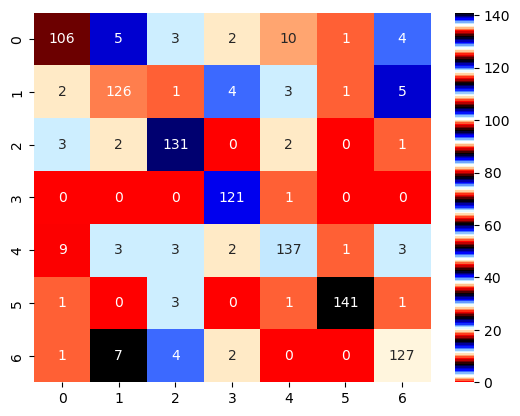

In [32]:
#LogisticRegression
warnings.filterwarnings('ignore')

logr = LogisticRegression()
logr.fit(X_train,y_train)

y_pred=logr.predict(X_test)
print(classification_report(y_test,y_pred))

# Accuracy
logDogruluk=accuracy_score(y_test,y_pred)
print("Logistik Regresyon doğruluk:", logDogruluk*100)

# Precision
from sklearn.metrics import precision_score
Precision =  precision_score(y_test, y_pred, average=None)
print("Precision değeri:",Precision[0]*100)

# Recall
from sklearn.metrics import recall_score
Recall = recall_score(y_test, y_pred, average=None)
print("Recall değeri:", Recall[0]*100)

# f1_score
from sklearn.metrics import f1_score
F1_score = f1_score(y_test, y_pred, average=None)
print("F1 Score değeri:",F1_score[0]*100)

# MAE
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_test, y_pred)
print("MAE değeri:",MAE)

# MSE
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test, y_pred)
print("MSE değeri:",MSE)

# RMSE
RMSE = np.sqrt(MSE)
print("RMSE değeri:",RMSE)

cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt=".0f",cmap='flag')
plt.show()

In [33]:
#LogisticRegression
#k-fold Cross Validation Yöntemiyle Modelin Performansının Ölçülmesi
warnings.filterwarnings('ignore')

from sklearn.model_selection import cross_val_score
accuricies = cross_val_score(estimator = logr, X=X_train, y=y_train, cv=10)
#accuricies
accMeanlogr = accuricies.mean()*100
accMeanlogr
#std = accuricies.std()*100
#std

89.66836734693878

In [ ]:
""" ÖNCEKİ PAREMETRELER İLE SONUÇLAR
Decision Tree doğruluk: 49.69387755102041
Precision değeri: 22.283609576427256
Recall değeri: 92.36641221374046
F1 Score değeri: 35.90504451038575
MAE değeri: 1.6489795918367347
MSE değeri: 7.106122448979592
RMSE değeri: 2.665731128411039

K-FOLD : 49.56632653061225
"""

              precision    recall  f1-score   support

           0       0.58      0.60      0.59       131
           1       0.59      0.61      0.60       142
           2       0.75      0.83      0.79       139
           3       0.86      0.82      0.84       122
           4       0.70      0.63      0.66       158
           5       0.94      0.84      0.88       147
           6       0.63      0.70      0.66       141

    accuracy                           0.72       980
   macro avg       0.72      0.72      0.72       980
weighted avg       0.72      0.72      0.72       980

Decision Tree doğruluk: 71.53061224489797
Precision değeri: 58.2089552238806
Recall değeri: 59.541984732824424
F1 Score değeri: 58.8679245283019
MAE değeri: 0.8653061224489796
MSE değeri: 3.2755102040816326
RMSE değeri: 1.8098370656171325


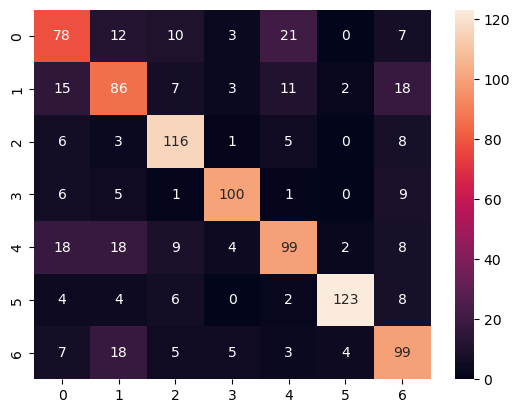

In [34]:
#DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

y_pred=dt.predict(X_test)
print(classification_report(y_test,y_pred))

# Accuracy
dtDogruluk=accuracy_score(y_test,y_pred)
print("Decision Tree doğruluk:", dtDogruluk*100)

# Precision
from sklearn.metrics import precision_score
Precision =  precision_score(y_test, y_pred, average=None)
print("Precision değeri:",Precision[0]*100)

# Recall
from sklearn.metrics import recall_score
Recall = recall_score(y_test, y_pred, average=None)
print("Recall değeri:", Recall[0]*100)

# f1_score
from sklearn.metrics import f1_score
F1_score = f1_score(y_test, y_pred, average=None)
print("F1 Score değeri:",F1_score[0]*100)

# MAE
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_test, y_pred)
print("MAE değeri:",MAE)

# MSE
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test, y_pred)
print("MSE değeri:",MSE)

# RMSE
RMSE = np.sqrt(MSE)
print("RMSE değeri:",RMSE)

cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt=".0f")
plt.show()

In [35]:
#DecisionTreeClassifier
#k-fold Cross Validation Yöntemiyle Modelin Performansının Ölçülmesi

from sklearn.model_selection import cross_val_score
accuricies = cross_val_score(estimator = dt, X=X_train, y=y_train, cv=10)
#accuricies
accMeanDT = accuricies.mean()*100
accMeanDT

71.78571428571428

In [ ]:
""" ÖNCEKİ PARAMETRELERLE SONUÇLAR
SVM doğruluk: 90.51020408163265
Precision değeri: 83.94160583941606
Recall değeri: 87.78625954198473
F1 Score değeri: 85.82089552238806
MAE değeri: 0.3112244897959184
MSE değeri: 1.256122448979592
RMSE değeri: 1.1207686866519746

K-FOLD: 90.0
"""


              precision    recall  f1-score   support

           0       0.83      0.88      0.86       131
           1       0.87      0.88      0.87       142
           2       0.94      0.93      0.93       139
           3       0.94      0.97      0.95       122
           4       0.90      0.87      0.89       158
           5       0.99      0.95      0.97       147
           6       0.90      0.91      0.90       141

    accuracy                           0.91       980
   macro avg       0.91      0.91      0.91       980
weighted avg       0.91      0.91      0.91       980

SVM doğruluk: 91.02040816326532
Precision değeri: 83.33333333333334
Recall değeri: 87.78625954198473
F1 Score değeri: 85.50185873605949
MAE değeri: 0.29285714285714287
MSE değeri: 1.1683673469387754
RMSE değeri: 1.0809104250301111


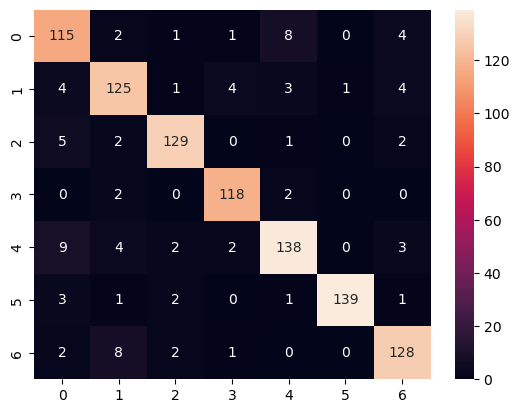

In [36]:
#SVC
warnings.filterwarnings('ignore')

"""
svc için en iyi değerler
{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=10, gamma=0.1)
"""

dvm = SVC(probability=True)
dvm.fit(X_train,y_train)

y_pred=dvm.predict(X_test)
print(classification_report(y_test,y_pred))

# Accuracy
dvmDogruluk=accuracy_score(y_test,y_pred)
print("SVM doğruluk:", dvmDogruluk*100)

# Precision
from sklearn.metrics import precision_score
Precision =  precision_score(y_test, y_pred, average=None)
print("Precision değeri:",Precision[0]*100)

# Recall
from sklearn.metrics import recall_score
Recall = recall_score(y_test, y_pred, average=None)
print("Recall değeri:", Recall[0]*100)

# f1_score
from sklearn.metrics import f1_score
F1_score = f1_score(y_test, y_pred, average=None)
print("F1 Score değeri:",F1_score[0]*100)

# MAE
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_test, y_pred)
print("MAE değeri:",MAE)

# MSE
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test, y_pred)
print("MSE değeri:",MSE)

# RMSE
RMSE = np.sqrt(MSE)
print("RMSE değeri:",RMSE)

cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt=".0f")
plt.show()

In [37]:
import warnings
warnings.filterwarnings('ignore')

#SVC
#k-fold Cross Validation Yöntemiyle Modelin Performansının Ölçülmesi

from sklearn.model_selection import cross_val_score
accuricies = cross_val_score(estimator = dvm, X=X_train, y=y_train, cv=10)
#accuricies
accMeanSVC = accuricies.mean()*100
accMeanSVC
#std = accuricies.std()*100
#std


90.12755102040816

              precision    recall  f1-score   support

           0       0.77      0.62      0.69       131
           1       0.67      0.79      0.73       142
           2       0.79      0.79      0.79       139
           3       0.93      0.93      0.93       122
           4       0.71      0.82      0.76       158
           5       0.99      0.90      0.94       147
           6       0.84      0.80      0.82       141

    accuracy                           0.81       980
   macro avg       0.82      0.81      0.81       980
weighted avg       0.81      0.81      0.81       980

Gaussian NB doğruluk: 80.61224489795919
Precision değeri: 77.14285714285715
Recall değeri: 61.832061068702295
F1 Score değeri: 68.64406779661017
MAE değeri: 0.5918367346938775
MSE değeri: 2.216326530612245
RMSE değeri: 1.488733196584346


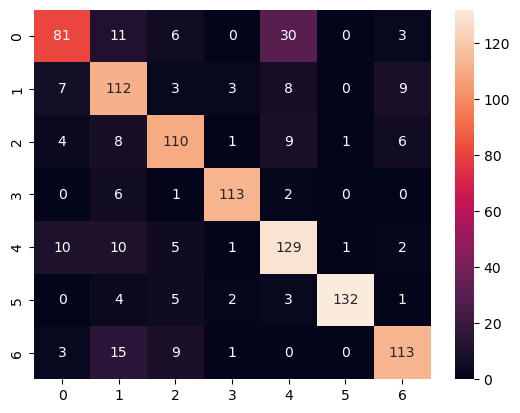

In [61]:
#GaussianNB
warnings.filterwarnings('ignore')

from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train,y_train)

y_pred=gnb.predict(X_test)
print(classification_report(y_test,y_pred))

# Accuracy
gnbDogruluk=accuracy_score(y_test,y_pred)
print("Gaussian NB doğruluk:", gnbDogruluk*100)

# Precision
from sklearn.metrics import precision_score
Precision =  precision_score(y_test, y_pred, average=None)
print("Precision değeri:",Precision[0]*100)

# Recall
from sklearn.metrics import recall_score
Recall = recall_score(y_test, y_pred, average=None)
print("Recall değeri:", Recall[0]*100)

# f1_score
from sklearn.metrics import f1_score
F1_score = f1_score(y_test, y_pred, average=None)
print("F1 Score değeri:",F1_score[0]*100)

# MAE
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_test, y_pred)
print("MAE değeri:",MAE)

# MSE
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test, y_pred)
print("MSE değeri:",MSE)

# RMSE
RMSE = np.sqrt(MSE)
print("RMSE değeri:",RMSE)

cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt=".0f")
plt.show()

In [62]:
#GaussianNB
#k-fold Cross Validation Yöntemiyle Modelin Performansının Ölçülmesi
warnings.filterwarnings('ignore')

from sklearn.model_selection import cross_val_score
accuricies = cross_val_score(estimator = gnb, X=X_train, y=y_train, cv=10)
#accuricies
accMeanGNB = accuricies.mean()*100
accMeanGNB
#std = accuricies.std()*100
#std

80.17857142857142

In [ ]:
""" ÖNCEKİ PARAMETRELER İLE SONUÇLAR
RandomForest doğruluk: 64.48979591836735
Precision değeri: 37.83783783783784
Recall değeri: 53.43511450381679
F1 Score değeri: 44.30379746835443
MAE değeri: 1.1051020408163266
MSE değeri: 4.38265306122449
RMSE değeri: 2.0934786985361207

K-FOLD: 63.46938775510205
"""

              precision    recall  f1-score   support

           0       0.78      0.78      0.78       131
           1       0.81      0.86      0.83       142
           2       0.87      0.94      0.91       139
           3       0.91      0.95      0.93       122
           4       0.86      0.80      0.83       158
           5       0.97      0.94      0.95       147
           6       0.86      0.81      0.84       141

    accuracy                           0.87       980
   macro avg       0.87      0.87      0.87       980
weighted avg       0.87      0.87      0.87       980

RandomForest doğruluk: 86.63265306122449
Precision değeri: 77.86259541984732
Recall değeri: 77.86259541984732
F1 Score değeri: 77.86259541984732
MAE değeri: 0.41836734693877553
MSE değeri: 1.626530612244898
RMSE değeri: 1.2753550926094654


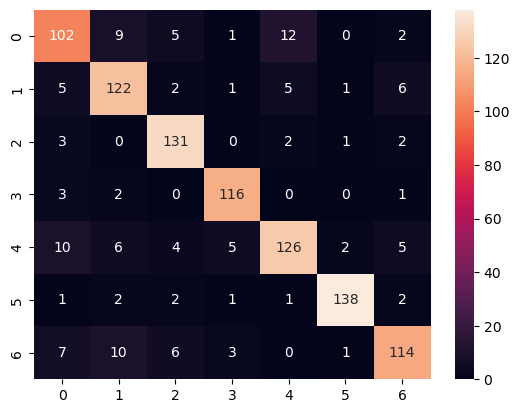

In [38]:
#RandomForestClassifier
warnings.filterwarnings('ignore')

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

y_pred = rfc.predict(X_test)
print(classification_report(y_test,y_pred))

# Accuracy
randomForestDogruluk=accuracy_score(y_test,y_pred)
print("RandomForest doğruluk:", randomForestDogruluk*100)

# Precision
from sklearn.metrics import precision_score
Precision =  precision_score(y_test, y_pred, average=None)
print("Precision değeri:",Precision[0]*100)

# Recall
from sklearn.metrics import recall_score
Recall = recall_score(y_test, y_pred, average=None)
print("Recall değeri:", Recall[0]*100)

# f1_score
from sklearn.metrics import f1_score
F1_score = f1_score(y_test, y_pred, average=None)
print("F1 Score değeri:",F1_score[0]*100)

# MAE
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_test, y_pred)
print("MAE değeri:",MAE)

# MSE
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test, y_pred)
print("MSE değeri:",MSE)

# RMSE
RMSE = np.sqrt(MSE)
print("RMSE değeri:",RMSE)


cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt=".0f")
plt.show()


In [39]:
#RandomForestClassifier
#k-fold Cross Validation Yöntemiyle Modelin Performansının Ölçülmesi
warnings.filterwarnings('ignore')

from sklearn.model_selection import cross_val_score
accuricies = cross_val_score(estimator = rfc, X=X_train, y=y_train, cv=10)
#accuricies
accMeanRFC = accuricies.mean()*100
accMeanRFC
#std = accuricies.std()*100
#std

87.11734693877551

In [ ]:
""" ÖNCEKİ PARAMETRELERLE SONUÇLAR
ANN doğruluk: 86.42857142857143
Precision değeri: 75.91240875912408
Recall değeri: 79.38931297709924
F1 Score değeri: 77.61194029850745
MAE değeri: 0.4142857142857143
MSE değeri: 1.5693877551020408
RMSE değeri: 1.252752072479643

K-FOLD: 84.3112244897959
"""

              precision    recall  f1-score   support

           0       0.83      0.84      0.83       131
           1       0.87      0.87      0.87       142
           2       0.93      0.91      0.92       139
           3       0.93      0.98      0.95       122
           4       0.89      0.85      0.87       158
           5       0.99      0.97      0.98       147
           6       0.90      0.92      0.91       141

    accuracy                           0.91       980
   macro avg       0.90      0.91      0.91       980
weighted avg       0.91      0.91      0.91       980

ANN doğruluk: 90.51020408163265
Precision değeri: 82.70676691729322
Recall değeri: 83.96946564885496
F1 Score değeri: 83.33333333333333
MAE değeri: 0.29081632653061223
MSE değeri: 1.1214285714285714
RMSE değeri: 1.058975245899814


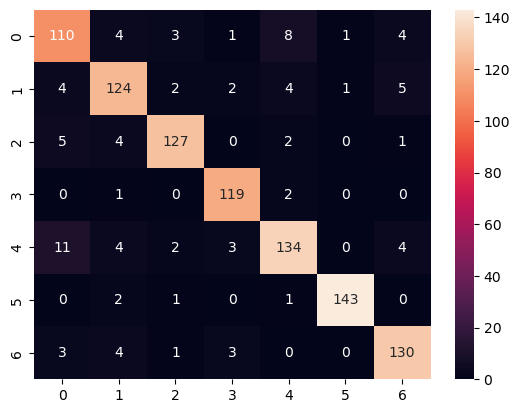

In [40]:
#Yapay Sinir Ağları(Artificial Nerual Network)

from sklearn.neural_network import MLPClassifier
mlpc = MLPClassifier()

mlpc.fit(X_train,y_train)

y_pred = mlpc.predict(X_test)
print(classification_report(y_test,y_pred))

# Accuracy
annDogruluk=accuracy_score(y_test,y_pred)
print("ANN doğruluk:", annDogruluk*100)

# Precision
from sklearn.metrics import precision_score
Precision =  precision_score(y_test, y_pred, average=None)
print("Precision değeri:",Precision[0]*100)

# Recall
from sklearn.metrics import recall_score
Recall = recall_score(y_test, y_pred, average=None)
print("Recall değeri:", Recall[0]*100)

# f1_score
from sklearn.metrics import f1_score
F1_score = f1_score(y_test, y_pred, average=None)
print("F1 Score değeri:",F1_score[0]*100)

# MAE
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_test, y_pred)
print("MAE değeri:",MAE)

# MSE
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test, y_pred)
print("MSE değeri:",MSE)

# RMSE
RMSE = np.sqrt(MSE)
print("RMSE değeri:",RMSE)


cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt=".0f")
plt.show()

In [41]:
#ANN

#k-fold Cross Validation Yöntemiyle Modelin Performansının Ölçülmesi
warnings.filterwarnings('ignore')

from sklearn.model_selection import cross_val_score
accuricies = cross_val_score(estimator = mlpc, X=X_train, y=y_train, cv=10)
#accuricies
accMeanANN = accuricies.mean()*100
accMeanANN
#std = accuricies.std()*100
#std

90.33163265306122

In [ ]:
""" ÖNCEKİ PARAMETRELERLE SONUÇLAR
CART doğruluk: 42.55102040816327
Precision değeri: 18.968133535660094
Recall değeri: 95.41984732824427
F1 Score değeri: 31.645569620253163
MAE değeri: 1.9816326530612245
MSE değeri: 8.940816326530612
RMSE değeri: 2.990119784645861

K-FOLD: 43.26530612244898
"""

              precision    recall  f1-score   support

           0       0.60      0.60      0.60       131
           1       0.59      0.63      0.61       142
           2       0.78      0.81      0.80       139
           3       0.87      0.82      0.84       122
           4       0.67      0.62      0.64       158
           5       0.92      0.84      0.88       147
           6       0.64      0.71      0.67       141

    accuracy                           0.72       980
   macro avg       0.72      0.72      0.72       980
weighted avg       0.72      0.72      0.72       980

CART doğruluk: 71.63265306122449
Precision değeri: 59.541984732824424
Recall değeri: 59.541984732824424
F1 Score değeri: 59.541984732824424
MAE değeri: 0.860204081632653
MSE değeri: 3.2683673469387755
RMSE değeri: 1.8078626460377945


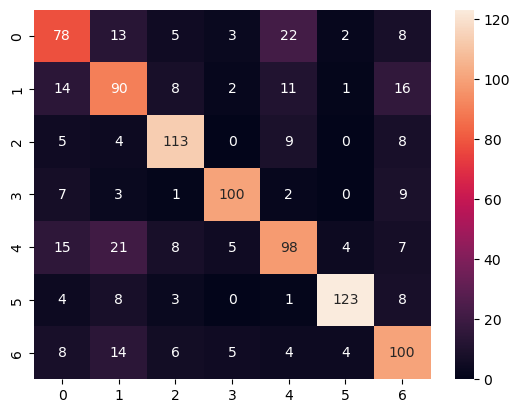

In [42]:
# CART (Classification and Regression Tree)

from sklearn.tree import DecisionTreeClassifier

cart = DecisionTreeClassifier()
cart.fit(X_train, y_train)

y_pred = cart.predict(X_test)
print(classification_report(y_test,y_pred))

# Accuracy
cartDogruluk=accuracy_score(y_test,y_pred)
print("CART doğruluk:", cartDogruluk*100)

# Precision
from sklearn.metrics import precision_score
Precision =  precision_score(y_test, y_pred, average=None)
print("Precision değeri:",Precision[0]*100)

# Recall
from sklearn.metrics import recall_score
Recall = recall_score(y_test, y_pred, average=None)
print("Recall değeri:", Recall[0]*100)

# f1_score
from sklearn.metrics import f1_score
F1_score = f1_score(y_test, y_pred, average=None)
print("F1 Score değeri:",F1_score[0]*100)

# MAE
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_test, y_pred)
print("MAE değeri:",MAE)

# MSE
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test, y_pred)
print("MSE değeri:",MSE)

# RMSE
RMSE = np.sqrt(MSE)
print("RMSE değeri:",RMSE)


cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt=".0f")
plt.show()


In [43]:
#CART

#k-fold Cross Validation Yöntemiyle Modelin Performansının Ölçülmesi
warnings.filterwarnings('ignore')

from sklearn.model_selection import cross_val_score
accuricies = cross_val_score(estimator = cart, X=X_train, y=y_train, cv=10)
#accuricies
accMeanCART = accuricies.mean()*100
accMeanCART
#std = accuricies.std()*100
#std

72.01530612244898

              precision    recall  f1-score   support

           0       0.80      0.81      0.81       131
           1       0.77      0.85      0.81       142
           2       0.90      0.92      0.91       139
           3       0.91      0.93      0.92       122
           4       0.88      0.81      0.84       158
           5       0.97      0.90      0.93       147
           6       0.84      0.86      0.85       141

    accuracy                           0.87       980
   macro avg       0.87      0.87      0.87       980
weighted avg       0.87      0.87      0.87       980

GBM doğruluk: 86.63265306122449
Precision değeri: 80.3030303030303
Recall değeri: 80.91603053435115
F1 Score değeri: 80.6083650190114
MAE değeri: 0.41836734693877553
MSE değeri: 1.620408163265306
RMSE değeri: 1.2729525377111695


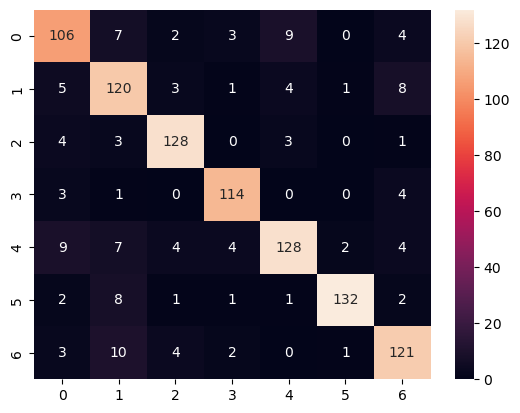

In [44]:
# Gradient Boosting Machine(GBM)

from sklearn.ensemble import GradientBoostingClassifier
gbm = GradientBoostingClassifier()
gbm.fit(X_train, y_train)

y_pred = gbm.predict(X_test)
print(classification_report(y_test,y_pred))

# Accuracy
gbmDogruluk=accuracy_score(y_test,y_pred)
print("GBM doğruluk:", gbmDogruluk*100)

# Precision
from sklearn.metrics import precision_score
Precision =  precision_score(y_test, y_pred, average=None)
print("Precision değeri:",Precision[0]*100)

# Recall
from sklearn.metrics import recall_score
Recall = recall_score(y_test, y_pred, average=None)
print("Recall değeri:", Recall[0]*100)

# f1_score
from sklearn.metrics import f1_score
F1_score = f1_score(y_test, y_pred, average=None)
print("F1 Score değeri:",F1_score[0]*100)

# MAE
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_test, y_pred)
print("MAE değeri:",MAE)

# MSE
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test, y_pred)
print("MSE değeri:",MSE)

# RMSE
RMSE = np.sqrt(MSE)
print("RMSE değeri:",RMSE)


cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt=".0f")
plt.show()

In [ ]:
#GBM

#k-fold Cross Validation Yöntemiyle Modelin Performansının Ölçülmesi
warnings.filterwarnings('ignore')

from sklearn.model_selection import cross_val_score
accuricies = cross_val_score(estimator = gbm, X=X_train, y=y_train, cv=10)
#accuricies
accMeanGBM = accuricies.mean()*100
accMeanGBM


In [ ]:
# eXtreme Gradient Boosting (XGBoost)

from xgboost import XGBClassifier
xgboost = XGBClassifier()
xgboost = XGBClassifier(learning_rate=0.001, max_depth=5, n_estimators=2000, subsample=1).fit(X_train, y_train)

y_pred = xgboost.predict(X_test)
print(classification_report(y_test,y_pred))

# Accuracy
xgboostDogruluk=accuracy_score(y_test,y_pred)
print("xgboost doğruluk:", xgboostDogruluk*100)

# Precision
from sklearn.metrics import precision_score
Precision =  precision_score(y_test, y_pred, average=None)
print("Precision değeri:",Precision[0]*100)

# Recall
from sklearn.metrics import recall_score
Recall = recall_score(y_test, y_pred, average=None)
print("Recall değeri:", Recall[0]*100)

# f1_score
from sklearn.metrics import f1_score
F1_score = f1_score(y_test, y_pred, average=None)
print("F1 Score değeri:",F1_score[0]*100)

# MAE
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_test, y_pred)
print("MAE değeri:",MAE)

# MSE
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test, y_pred)
print("MSE değeri:",MSE)

# RMSE
RMSE = np.sqrt(MSE)
print("RMSE değeri:",RMSE)


cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt=".0f")
plt.show()

In [ ]:
# xgboost 

#k-fold Cross Validation Yöntemiyle Modelin Performansının Ölçülmesi
warnings.filterwarnings('ignore')

from sklearn.model_selection import cross_val_score
accuricies = cross_val_score(estimator = xgboost , X=X_train, y=y_train, cv=10)
#accuricies
accMeanXGBOOST = accuricies.mean()*100
accMeanXGBOOST


In [ ]:
# LightGBM

from lightgbm import LGBMClassifier
lightgbm = LGBMClassifier()
lightgbm = LGBMClassifier(learning_rate=0.01, max_depth=1, n_estimators=500).fit(X_train, y_train)

y_pred = lightgbm.predict(X_test)
print(classification_report(y_test,y_pred))

# Accuracy
lightgbmDogruluk=accuracy_score(y_test,y_pred)
print("LightGBM doğruluk:", lightgbmDogruluk*100)

# Precision
from sklearn.metrics import precision_score
Precision =  precision_score(y_test, y_pred, average=None)
print("Precision değeri:",Precision[0]*100)

# Recall
from sklearn.metrics import recall_score
Recall = recall_score(y_test, y_pred, average=None)
print("Recall değeri:", Recall[0]*100)

# f1_score
from sklearn.metrics import f1_score
F1_score = f1_score(y_test, y_pred, average=None)
print("F1 Score değeri:",F1_score[0]*100)

# MAE
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_test, y_pred)
print("MAE değeri:",MAE)

# MSE
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test, y_pred)
print("MSE değeri:",MSE)

# RMSE
RMSE = np.sqrt(MSE)
print("RMSE değeri:",RMSE)


cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt=".0f")
plt.show()

In [ ]:
# LightGBM 

#k-fold Cross Validation Yöntemiyle Modelin Performansının Ölçülmesi
warnings.filterwarnings('ignore')

from sklearn.model_selection import cross_val_score
accuricies = cross_val_score(estimator = lightgbm , X=X_train, y=y_train, cv=10)
#accuricies
accMeanLGBM = accuricies.mean()*100
accMeanLGBM


In [ ]:
# Category Boosting (CatBoost)

from catboost import CatBoostClassifier
catboost = CatBoostClassifier()
catboost = CatBoostClassifier(iterations=1000, learning_rate=0.003, depth=8).fit(X_train, y_train, verbose=False)

y_pred = catboost.predict(X_test)
print(classification_report(y_test,y_pred))

# Accuracy
catboostDogruluk=accuracy_score(y_test,y_pred)
print("CatBoost doğruluk:", catboostDogruluk*100)

# Precision
from sklearn.metrics import precision_score
Precision =  precision_score(y_test, y_pred, average=None)
print("Precision değeri:",Precision[0]*100)

# Recall
from sklearn.metrics import recall_score
Recall = recall_score(y_test, y_pred, average=None)
print("Recall değeri:", Recall[0]*100)

# f1_score
from sklearn.metrics import f1_score
F1_score = f1_score(y_test, y_pred, average=None)
print("F1 Score değeri:",F1_score[0]*100)

# MAE
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_test, y_pred)
print("MAE değeri:",MAE)

# MSE
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test, y_pred)
print("MSE değeri:",MSE)

# RMSE
RMSE = np.sqrt(MSE)
print("RMSE değeri:",RMSE)


cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt=".0f")
plt.show()

In [ ]:
# CatBoost 

#k-fold Cross Validation Yöntemiyle Modelin Performansının Ölçülmesi
warnings.filterwarnings('ignore')

from sklearn.model_selection import cross_val_score
accuricies = cross_val_score(estimator = catboost , X=X_train, y=y_train, cv=10)
#accuricies
accMeanCatB = accuricies.mean()*100
accMeanCatB


In [ ]:
modeller = pd.DataFrame({'Model':['Logistik Regresyon',
                                  'Karar Ağaçları',
                                  'Rastgele Orman',
                                  'Destek Vektör Makinesi',
                                  'K-en yakın komşu',
                                  'Gaussian NB',
                                   'Keras',
                                   'ANN',
                                   'CART',
                                   'GBM',
                                   'XGBoost',
                                   'LightGBM',
                                   'CatBoost'
                                   ],
                        'Score':[ logDogruluk,dtDogruluk,randomForestDogruluk,dvmDogruluk,knnDogruluk,gnbDogruluk,kerasScores[1],annDogruluk,cartDogruluk,gbmDogruluk,xgboostDogruluk,lightgbmDogruluk,catboostDogruluk ] })

modeller

In [ ]:
modeller.sort_values(by='Score',ascending=False)

In [ ]:
sns.barplot( x = modeller.Score , y=modeller.Model )

plt.xlabel("Score")
plt.ylabel("Modeller")
plt.title("Sınıflandırma model scorları")
plt.show()

In [ ]:
#k-fold sonuçları
modeller = pd.DataFrame({'Model':['Logistik Regresyon',
                                  'Karar Ağaçları',
                                  'Rastgele Orman',
                                  'Destek Vektör Makinesi',
                                  'K-en yakın komşu',
                                  'Gaussian NB',
                                   'Keras',
                                   'ANN',
                                   'CART',
                                   'GBM',
                                   'XGBoost',
                                   'LightGBM',
                                   'CatBoost'
                                 ],
                        'Score':[accMeanlogr,accMeanDT,accMeanRFC,accMeanSVC,accMeanKNN,accMeanGNB,accMeanKeras,accMeanANN,accMeanCART,accMeanGBM,accMeanXGBOOST,accMeanLGBM,accMeanCatB]})
modeller

In [ ]:
modeller.sort_values(by='Score',ascending=False)

In [ ]:
sns.barplot( x= modeller.Score , y=modeller.Model )

plt.xlabel("Score")
plt.ylabel("Modeller")
plt.title("Sınıflandırma model scorları")
plt.show()

In [ ]:
# derin öğrenme algoritmaları ile sınıflandırma

from keras.models import Sequential
from keras.layers import Dense

kerasModel=Sequential()
kerasModel.add(Dense(28, input_dim=58, kernel_initializer="uniform", activation='relu'))
kerasModel.add(Dense(28, kernel_initializer='uniform', activation='relu'))
kerasModel.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
print("Ağ oluşturuldu...")

In [ ]:
kerasModel.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy'])
print("Ağ derlendi...")

In [ ]:
kerasModel.fit(X_train, y_train,
          epochs=150, 
          batch_size=10, 
          verbose=0)
print("Ağ eğitildi...")

In [ ]:
kerasScores=kerasModel.evaluate(X_test,y_test)
print("Ağ başarı oran:%{:.2f}".format(kerasScores[1]*100))

In [ ]:
y_pred = kerasModel.predict(X_test)

y_pred = (y_pred > 0.5)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

#print(cm)
print(classification_report(y_test,y_pred))

# Accuracy
kerasDogruluk=accuracy_score(y_test,y_pred)
print("keras doğruluk:", kerasDogruluk*100)

# Precision
from sklearn.metrics import precision_score
Precision =  precision_score(y_test, y_pred, average=None)
print("Precision değeri:",Precision[0]*100)

# Recall
from sklearn.metrics import recall_score
Recall = recall_score(y_test, y_pred, average=None)
print("Recall değeri:", Recall[0]*100)

# f1_score
from sklearn.metrics import f1_score
F1_score = f1_score(y_test, y_pred, average=None)
print("F1 Score değeri:",F1_score[0]*100)

# MAE
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_test, y_pred)
print("MAE değeri:",MAE)

# MSE
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test, y_pred)
print("MSE değeri:",MSE)

# RMSE
RMSE = np.sqrt(MSE)
print("RMSE değeri:",RMSE)

cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt=".0f", cmap="BuPu")
plt.show()

In [ ]:
from sklearn.model_selection import StratifiedKFold

number_of_sample=len(X)
kfold=StratifiedKFold(n_splits=5, shuffle=True, random_state=24)
cv_scores=list()
counter=1

for train, test in kfold.split(X_train, y_train):
    kerasModelK=Sequential()
    kerasModelK.add(Dense(28, input_dim=58, kernel_initializer="uniform", activation='relu'))
    kerasModelK.add(Dense(28, kernel_initializer='uniform', activation='relu'))
    kerasModelK.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
    print("CV{}:Ağ oluşturuldu...".format(counter))
    kerasModelK.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy'])
    print("CV{}:Ağ derlendi...".format(counter))
    kerasModelK.fit(X_train, y_train,
              epochs=150, 
              batch_size=10, 
              verbose=0)
    print("CV{}:Model eğitildi..".format(counter))
    scores=kerasModelK.evaluate(X_train, y_train)
    print("CV{}:Ağ başarı oran:%{:.2f}".format(counter, scores[1]*100))
    cv_scores.append(scores[1]*100)
    counter+=1
    print()

In [ ]:
print("Ortalama başarı oranı:%{:.2f} (+/- {:.2f})".format(
    np.mean(cv_scores),
    np.std(cv_scores))) 

accKeras = np.mean(cv_scores)
accKeras

In [ ]:
y_pred = kerasModelK.predict(X_test)

y_pred = (y_pred > 0.5)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

#print(cm)
print(classification_report(y_test,y_pred))

# Accuracy
accMeanKeras=accuracy_score(y_test,y_pred)
accMeanKeras = accMeanKeras*100
print("keras doğruluk:", accMeanKeras)

# Precision
from sklearn.metrics import precision_score
Precision =  precision_score(y_test, y_pred, average=None)
print("Precision değeri:",Precision[0]*100)

# Recall
from sklearn.metrics import recall_score
Recall = recall_score(y_test, y_pred, average=None)
print("Recall değeri:", Recall[0]*100)

# f1_score
from sklearn.metrics import f1_score
F1_score = f1_score(y_test, y_pred, average=None)
print("F1 Score değeri:",F1_score[0]*100)

# MAE
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_test, y_pred)
print("MAE değeri:",MAE)

# MSE
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test, y_pred)
print("MSE değeri:",MSE)

# RMSE
RMSE = np.sqrt(MSE)
print("RMSE değeri:",RMSE)

cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt=".0f", cmap="BuPu")
plt.show()

In [17]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


lgbm = LGBMClassifier()
xgb = XGBClassifier()

lgbm.fit(X_train,y_train)
xgb.fit(X_train,y_train)
y_pred_lgbm = lgbm.predict(X_test)
y_pred_xgb = xgb.predict(X_test)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.457382 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 128569
[LightGBM] [Info] Number of data points in the train set: 3920, number of used features: 4087
[LightGBM] [Info] Start training from score -1.929966
[LightGBM] [Info] Start training from score -1.949488
[LightGBM] [Info] Start training from score -1.944126
[LightGBM] [Info] Start training from score -1.914273
[LightGBM] [Info] Start training from score -1.978581
[LightGBM] [Info] Start training from score -1.958489
[LightGBM] [Info] Start training from score -1.947697
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [26]:
print("Accuracy lgbm:",accuracy_score(y_test, y_pred_lgbm))
print("Precision lgbm:",precision_score(y_test, y_pred_lgbm,average="micro"))

print("Accuracy xgb:",accuracy_score(y_test, y_pred_xgb))
print("Precision xgb:",precision_score(y_test, y_pred_xgb,average="micro"))



Accuracy lgbm: 0.8908163265306123
Precision lgbm: 0.8908163265306123
Accuracy xgb: 0.8836734693877552
Precision xgb: 0.8836734693877552


# GRIDSEARCHCV

In [24]:

"""
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train, y_train)

# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)
"""

"""
svc için en iyi değerler
{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=10, gamma=0.1)
"""

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.765 total time= 2.6min
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.749 total time= 2.4min
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.747 total time= 2.4min
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.759 total time= 2.4min
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.733 total time= 2.4min
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.208 total time= 2.2min
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.209 total time= 2.3min
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.205 total time= 2.3min
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.221 total time= 2.3min
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.205 total time= 2.4min
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.147 total time= 2.1min
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 2/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.925 total time= 2.0min
[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.898 total time= 1.9min
[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.912 total time= 2.1min
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.861 total time= 2.0min
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.894 total time= 1.1min
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.913 total time= 1.2min
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.894 total time= 1.1min
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.908 total time= 1.1min
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.864 total time= 1.1min
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.890 total time= 1.0min
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.912 total time= 1.1min
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.895 total time= 1.1min
[CV 4/5] END ....C=1000, gam